In [2]:
!pip install numpy-financial

### **Calculating simple interest**

Learning to calculate simple interest is an important first step in building up to calculating the price of a bond.

Here you will apply what you have learned to calculate simple interest on a savings account.

A savings account offers a `3%` interest rate (simple interest) per year paid yearly. You decide to invest USD `10,000` in this account for a period of `10` years.

* Assign the present value, rate, and number of periods to `pv`, `r`, and `n`, respectively.
* Using the formula for simple interest, calculate and print the total amount of simple interest earned after `10` years.
* Calculate and print the value of the account after `10` years.

In [6]:
# Assign present value, rate and number of periods
pv = 10000
r = 0.03
n = 10

# Calculate total amount of simple interest earned
simple_interest = pv * r * n
print(f'simple_interest = {simple_interest:,.2f}')

# Calculate value of the savings account
fv = pv + simple_interest
print(f'fv = {fv:,.2f}')

simple_interest = 3,000.00
fv = 13,000.00


### **Calculating compound interest**

Compound interest is much more applicable in the real world and is an important feature in calculating the price of a bond, as you will see in the next chapter.

Now imagine the same savings account pays `3%` per year as compound interest instead of simple interest. As before, you invest USD `10,000` for a period of ten years.

* Assign the present value, rate, and number of periods to `pv`, `r`, and `n`, respectively.
* Find how much money the savings account will have after ten years and print the result.
* Calculate and print the amount of interest earned over the ten years.

In [7]:
# Assign present value, rate and number of periods
pv = 10000
r = 0.03
n = 10

# Calculate the value of the savings account
fv = pv * (1 + r)**n
print(f'fv = {fv:,.2f}')

# Calculate the total amount of compound interest earned
compound_interest = fv - pv
print(f'compound_interest = {compound_interest:,.2f}')

fv = 13,439.16
compound_interest = 3,439.16


# **Compound Interest with Multiple Cashflows**

* 1,000 Deposit
* 3% monthly interest rate
* 100 extra deposit at the end of each month

How much do we earn after 3 months

$$1,000(1+0.03)^3 + 100(1+0.03)^2 + 100(1+0.03) + 100 = 1401.817$$

The amount earned is $1401.817 - 1,300 = 101.817$


# **The future value function**

In [10]:
import numpy_financial as npf

npf.fv(rate=0.03, nper=3, pmt=-100, pv=-1000) # ระวังเครื่องหมายลบ หมายถึงการออกเงินไป

1401.817

# **Compounding Frequencies**

How much  do we have after 10 years for depositing one time 1,000\$ at

* 5% annual interest rate paid annually
* 5% annual interest rate paid monthly
* 5% annual interest rate paid daily

# **THIS IS IN CONTRAST WITH THE COURSE INTRODUCTION TO FINANCIAL CONCEPTS, WHERE THE MONTHLY RATE AND DAILY RATE SHOULD BE**

$$r_{month} = (1 + r_{year})^{\frac{1}{12}}-1$$
$$r_{day} = (1 + r_{year})^{\frac{1}{365}}-1$$

# **It was stated there explicitly that you cannot just use $r_{month} = \dfrac{r_{year}}{12}$ or $r_{day} = \dfrac{r_{year}}{365}$ directly.  <ins>It seems this is used when computing pmt for mortgage loans.</ins>**

In this course, it says "If the rate is monthly, we divide the rate by 12 and multiply the number of periods by twelve as there are twelve months in the year". 



In [16]:
print(f'FV after a year compounded once at annual rate = {npf.fv(rate=0.05, nper=10, pmt=0, pv=-1000):,.2f}')
print(f'FV after a year compounded 12 times at monthly rate = {npf.fv(rate=0.05/12, nper=10*12, pmt=0, pv=-1000):,.2f}')
print(f'FV after a year compounded 365 times at daily rate = {npf.fv(rate=0.05/365, nper=10*365, pmt=0, pv=-1000):,.2f}')

FV after a year compounded once at annual rate = 1,628.89
FV after a year compounded 12 times at monthly rate = 1,647.01
FV after a year compounded 365 times at daily rate = 1,648.66


The higher the compounding frequency, the more money we end up with. This is because the sooner we receive an interest payment, the sooner this interest can also start earning compound interest by being reinvested.

## **If we convert the annual rate to be monthly rate as in the course "Introduction to Financial Concepts", we get the same amount of money as FV once a year**

In [17]:
print(npf.fv(rate=(1 + 0.05)**(1/365)-1, nper=10*365, pmt=0, pv=-1000))
print(npf.fv(rate=(1 + 0.05)**(1/12)-1, nper=10*12, pmt=0, pv=-1000))
print(npf.fv(rate=0.05, nper=10, pmt=0, pv=-1000))

1628.8946267777742
1628.8946267774515
1628.894626777442


### **Calculating future value**

Calculating future value is an important step in building up to bond pricing as the process of pricing a bond is actually calculating future value in reverse. Here you will find the future value of an investment using the `npf.fv()` formula from earlier.

* Import the `numpy_financial` package using the alias `npf`.
* Calculate the future value of an investment of USD 10,000 with top-ups of USD 5,000 each year for 30 years earning 5% annual interest and assign the result to savings.


In [18]:
# Import numpy_financial package using the alias npf
import numpy_financial as npf

# Calculate the future value of an investment
savings = npf.fv(rate=0.05, nper=30, pmt=-5000, pv=-10000)

# Print the result
print(f'savings = {savings:,.2f}')

savings = 375,413.66


### **Calculating compounding frequencies**

Different compounding frequencies can greatly affect how much your money will grow. In this exercise, we are going to compare three different savings accounts, each offering a different annual rate at a different compounding frequency, to see which one will grow your money the most.

In each example you will start with an initial investment of $10,000 that you invest for ten years. numpy_financial has already been imported for you as `npf`.

* Calculate the future value of USD `10,000` invested in a savings account offering `5%` annual interest paid once per year for `10` years and assign to `account_1`.
* Calculate the value of USD `10,000` invested in a savings account offering `4.5%` annual interest paid monthly (i.e., `12` times per year) for `10` years and assign to `account_2`.
* Calculate the value of USD `10,000` invested in a savings account offering `4.9%` annual interest paid daily (i.e., `365` times per year) for `10` years and assign to `account_3`.

In [19]:
# Calculate and print the growth of USD 10,000 invested in the first account
account_1 = npf.fv(rate=0.05, nper=10, pmt=0, pv=-10000)

# Calculate and print the growth of USD 10,000 invested in the second account
account_2 = npf.fv(rate=0.045/12, nper=10*12, pmt=0, pv=-10000)

# Calculate the growth of USD 10,000 invested in the third account
account_3 = npf.fv(rate=0.049/365, nper=10*365, pmt=0, pv=-10000)

# Print the value of the third savings account
print(account_1, account_2, account_3)

16288.94626777442 15669.927762817757 16322.625380911302


# **nper() function**
* number of periods required to grow PV to FV

### **Calculating the number of periods**

One real-life example that uses this function is calculating how long it will take you to reach a certain financial goal, be it growing your wealth, saving for something specific, or paying off debt.

How long will it take you to save USD 30,000 if you save USD 1,250 per quarter invested in a fund that offers 4.5% annual returns compounded quarterly?

* Use the `npf.nper()` function to calculate how long it will take you to reach your savings goal based on the information above

In [20]:
# Import numpy_financial package using alias npf
import numpy_financial as npf

# Calculate how long it will take to reach the savings goal
number_periods = npf.nper(rate=0.045/4, pmt=-1250, pv=0, fv=30000)

# Print the result
print(number_periods)

21.365232331911212


It took you 21 quarters, or just over 5 years to reach your goal.

# **pmt() function**
# **THIS IS IN DEFINITE CONTRAST WITH INTRO TO FINANCIAL CONCEPTS.  THERE, THE ANNUAL RATE MUST BE CONVERTED DIFFERENTLY THAN JUST DIVIDING BY THE NUMBER OF PERIODS**

* Tells you the payment amount required to grow PV to FV

### **Calculating the payment amount**

Another real-life problem you might encounter is how much money you need to save each month to hit a financial target within a set time.

You saw earlier that to pay off a mortgage of USD 275,000 in ten years with an annual interest rate of 3.5% compounded monthly, you needed to pay USD 2,719 per month.

If, instead, you wanted to take twenty years to pay off the mortgage, calculate how much you would need to pay per month now.

* Use the `npf.pmt()` function to calculate the required monthly payment





In [21]:
# Import the numpy_financial package using the alias npf
import numpy_financial as npf

# Calculate monthly payment required
required_payment = npf.pmt(rate=0.035/12, nper=20*12, pv=275000, fv=0)

# Print the result
print(required_payment)

-1594.8892244535023


Notice that although we doubled the time to pay off the mortgage, the monthly payments dropped only by around 40% instead of by half, this is because the relationship isn't linear.

# **rate() function**
* Tells you interest rate required to grow PV to FV

### **Calculating the required interest rate**

If you have a certain financial goal in mind, such as saving a set amount of money by a set time, you can calculate what return will achieve this goal.

This is useful if, for example, you wanted to check if the goal you have set is realistic given current levels of interest rates.

Earlier, you saw that to retire in 30 years with USD 1,000,000 in the bank by investing USD 1,500 per month, you needed to earn an annual return of 3.77%. Calculate how much higher this return would need to be if you wanted to retire with USD 2,000,000 instead, again using monthly compounding.

* Use the `npf.rate()` function to calculate the required return

In [22]:
# Import the numpy_financial package using the alias npf
import numpy_financial as npf

# Calculate return on investments required: required_return
required_return = 12*npf.rate(nper=30*12, pmt=-1500, pv=0, fv=2000000)

# Print the result
print(required_return)

0.07447372232991042


Notice that although the amount we wanted to retire with doubled, the required annual return of 7.45% was slightly less than double; this is because the relationship isn't linear.

### **Solving real-world problems**

Now you are going to use the functions you have learned to solve some real-life problems:

You want to start investing and find a bond paying a 3% annual rate compounded monthly. If you invest USD 100 per month, how much will you have after five years?

1. Find how much a USD 100 per month investment at a 3% annual rate compounded monthly grows to after 5 years.

You are saving for a deposit on a house. You need to save up USD 15,000 and have saved USD 5,000 so far. If you save USD 250 per month, how many months until you reach your goal?

2. Find the time to save USD 15,000 starting with USD 5,000 and adding USD 250 per month at 5% interest compounded monthly.

You are 22 years old and want to retire at 65 with USD 1 million in the bank. If you can grow your money at 5% per year, how much should you invest per month?

3. Find the monthly savings to retire with USD 1,000,000 starting with USD 0, earning 5% interest compounded monthly.





In [23]:
import numpy_financial as npf

# Calculate how much USD 100 per month compounding at 3% grows to after 5 years
total_savings = npf.fv(rate=0.03/12, nper=5*12, pmt=-100, pv=0)
print(total_savings)

# Calculate the time to reach a USD 15,000 deposit on a house
time_to_goal = npf.nper(rate=0.05/12, pmt=-250, pv=-5000, fv=15000)
print(time_to_goal)

# Calculate the monthly contributions needed to retire with USD 1,000,000
monthly_contributions = npf.pmt(rate=0.05/12, nper=(65-22)*12, pv=0, fv=1000000)
print(monthly_contributions)

6464.67126221082
34.41570331103298
-552.1252103174048


# **Present Value**

$$FV = PV \times (1 + r)^n \ \ \ \ \text{Compounding}$$


$$PV = \frac{FV}{(1+r)^n} \ \ \ \ \ \ \ \ \ \ \ \text{Discounting}$$


$$PV ⟺ FV$$

* A higher interest rate or longer time period increases the FV, so ...
* A higher interest rate or longer time period must decrease the PV.

How much is 10,000\$ worth in the next 10 years at 5% annual interest rate?  Or

How much should we invest now at 5% annually to have 10,000\$ in the next 10 years?

$$PV = \frac{10,000}{(1 + 0.05)^{10}} = 6,139.13$$

# **pv() function**

In [7]:
import numpy_financial as npf

print('{:,.2f}'.format(-npf.pv(rate=0.05, nper=10, pmt=0, fv=10000)))

6,139.13


### **Calculating present value**

Compound interest can have a very powerful effect over time. In this exercise, you will examine how much you need to invest upfront at different interest rates to achieve a financial target. `numpy_financial` has already been imported for you as `npf`.

Imagine you want to have saved USD 11,000 after `7` years and consider three different investments, each paying `3`%, `4`%, and `5`% annual interest compounded monthly. If you contribute USD `100` per month, what initial lump sum should you also invest to achieve this goal?


* Calculate the upfront **PV** you need to invest at `3`% annual interest compounded monthly, with monthly top-ups of USD `100` to reach USD `11,000` in `7` years, and print the result.
* Calculate the upfront **PV** you need to invest at `4`% annual interest compounded monthly, with monthly top-ups of USD `100` to reach USD `11,000` in `7` years, and print the result.
* Calculate the upfront **PV** you need to invest at `5`% annual interest compounded monthly, with monthly top-ups of USD `100` to reach USD `11,000` in `7` years, and print the result.

In [13]:
import numpy_financial as npf

# Calculate the upfront investment at 3% interest
pv_three_percent = -npf.pv(rate=0.03/12, nper=7*12, pmt=-100, fv=11000)

# Print the result
print(f"3% Annual Interest Upfront Investment: {pv_three_percent:,.2f}")

# Calculate the upfront investment at 4% interest
pv_four_percent = -npf.pv(rate=0.04/12, nper=7*12, pmt=-100, fv=11000)

# Print the result
print(f"4% Annual Interest Upfront Investment: {pv_four_percent:,.2f}")

# Calculate the upfront investment at 5% interest
pv_five_percent = -npf.pv(rate=0.05/12, nper=7*12, pmt=-100, fv=11000)

# Print the result
print(f"5% Annual Interest Upfront Investment: {pv_five_percent:,.2f}")

3% Annual Interest Upfront Investment: 1,350.63
4% Annual Interest Upfront Investment: 1,001.57
5% Annual Interest Upfront Investment: 682.02


# **zero coupon bonds**

* Pays a single cash-flow called the **face value**
* Paid at a single point in time called the **maturity**
* No intermediate cash-flows (called **coupons**) paid until **maturity**, hence the name
* The price is the ***PV*** of the single cash-flow, but actually sold at a discount to their face value.

* <ins>Example</ins>:
  * 3 year maturity
  * A face value of 100
  * A yield of 3.5%

The price of this bond equals $$\dfrac{100}{(1 + 0.035)^3} = 90.19$$

### **Pricing zero coupon bonds**

You have seen that the price of a zero coupon bond is simply the **PV** of a single cash-flow in the future. How much that single cash-flow is worth today will depend on how far it is into the future and what interest rate (yield) you discount it at. We will investigate this now.

To do this, you are going to price a zero coupon bond with a three year maturity and yield of 5% per year. Then you will change the maturity and yield and see how these factors affect the price.

In this exercise, you are going to work directly with the compound interest formula instead of using the `npf.pv()` function.

Recall that our PV formula is 
 
$$PV \ \ = \ \ \frac{FV}{(1 + r)^n}$$

* Find the price of a zero coupon bond with a three year maturity, 5% yield, and USD 100 face value and print the result.

* Find the price of a zero coupon bond with a ten year maturity, 5% yield, and USD 100 face value and print the result.


* Find the price of a zero coupon bond with a three year maturity, 7% yield, and USD 100 face value and print the result.

In [14]:
price_1 = 100/(1 + 0.05)**3
price_2 = 100/(1 + 0.05)**10
price_3 = 100/(1 + 0.07)**3

# Print the result
print("3 year 5% yield ZCB: {:,.2f}".format(price_1))
print("10 year 5% yield ZCB:{:,.2f} ".format(price_2))
print("3 year 7% yield ZCB: {:,.2f}".format(price_3))


3 year 5% yield ZCB: 86.38
10 year 5% yield ZCB:61.39 
3 year 7% yield ZCB: 81.63


 Increasing either the time to maturity or yield means we are applying more discounting to the single cash-flow (face value), giving it a lower PV and hence a lower price for the zero coupon bond.

 # **Coupon paying bonds**

* 3 year bond
* 3% annual coupon
* face value of USD 100 
* yield of 4%:

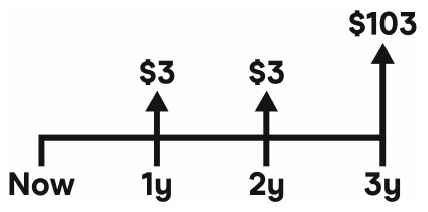

We break the bond up into a collection of ***zero coupon bonds***, then price these:

* A 1 year zero coupon bond with a face value of USD 3: $\dfrac{3}{1+0.04} = 2.88$
* A 2 year zero coupon bond with a face value of USD 3: $\dfrac{3}{(1+0.04)^2} = 2.77$
* A 3 year zero coupon bond with a face value of USD 103: $\dfrac{103}{(1+0.04)^3} = 91.57$

Coupon Bond Price : $2.88 + 2.77 + 91.57 = 97.22$

## **Coupon Bond Price Formula**

$$Price = PV = \frac{C}{1+r} + \frac{C}{(1+r)^2} + \cdots + \frac{C+P}{(1+r)^n}$$

* $C$ is the ***coupon*** paid in each time period
* $r$ is the ***yield*** to maturity of the bond
* $P$ is the ***face value*** (or principal) paid at maturity
* $n$ is the number of time ***periods*** (typically years)

In [18]:
import numpy_financial as npf

print("{:,.2f}".format(-npf.pv(rate=0.04, nper=3, pmt=3, fv=100)))
print("{:,.2f}".format(3/1.04 + 3/1.04**2 + 103/1.04**3))

97.22
97.22


### **Impact of bond yields on price**

In the financial markets, <ins>interest rates are ***constantly changing***</ins>, and these changes will influence bond prices as the interest rate you use to discount the cash-flows of the bond (a.k.a. the yield) changes.

To get a better feel for how the prices of bonds behave with respect to yields, you will price a bond using a set yield to maturity, then price the same bond using both a higher and lower yield to maturity and see how this affects the bond price.

`numpy_financial` has already been imported for you as `npf`.


1. Find the price of a `10` year bond with a face value of USD `100`, annual coupon of `3`%, yield of `4`%, and print the result.

2. Find the price of a `10` year bond with a face value of USD `100`, annual coupon of `3`%, yield of `3`%, and print the result.

3. Find the price of a `10` year bond with a face value of USD `100`, annual coupon of `3`%, yield of `5`%, and print the result.

In [20]:
import numpy_financial as npf

bond_yield_3 = -npf.pv(rate=0.03, nper=10, pmt=3, fv=100)
bond_yield_4 = -npf.pv(rate=0.04, nper=10, pmt=3, fv=100)
bond_yield_5 = -npf.pv(rate=0.05, nper=10, pmt=3, fv=100)

print("3% Yield Price: {:,.2f}".format(bond_yield_3))
print("4% Yield Price: {:,.2f}".format(bond_yield_4))
print("5% Yield Price: {:,.2f}".format(bond_yield_5))



3% Yield Price: 100.00
4% Yield Price: 91.89
5% Yield Price: 84.56


When interest rates are higher, we discount the cash-flows of a bond at a higher rate, meaning their PV will be lower. As a bond is just the sum of the PV of each cash-flow, this means the bond price will be lower when interest rates are higher, and vice versa.

### **Impact of coupons on price**

You have looked at how changing the yield to maturity of a bond has a big impact on its price. Changing the coupon, i.e., the amount of money the bond pays in each period, can also have an impact on the bond's price. This is what you are going to investigate now by comparing bonds with high and low coupons.

1. Find the price of a `10` year bond with a face value of USD `100`, annual coupon of `2`%, yield of `4`%, and print the result.

2. Find the price of a `10` year bond with a face value of USD `100`, annual coupon of `5`%, yield of `4`%, and print the result.

3. Find the price of a `10` year bond with a face value of USD `100`, annual coupon of `10`%, yield of `4`%, and print the result.

In [22]:
import numpy_financial as npf

bond_coupon_2 = -npf.pv(rate=0.04, nper=10, pmt=2, fv=100)
bond_coupon_5 = -npf.pv(rate=0.04, nper=10, pmt=5, fv=100)
bond_coupon_10 = -npf.pv(rate=0.04, nper=10, pmt=10, fv=100)

print("2% Coupon Price: {:,.2f}".format(bond_coupon_2))
print("5% Coupon Price: {:,.2f}".format(bond_coupon_5))
print("10% Coupon Price: {:,.2f}".format(bond_coupon_10))

2% Coupon Price: 83.78
5% Coupon Price: 108.11
10% Coupon Price: 148.67


A higher coupon makes the bond more valuable makes sense; if the bond pays you more money, it must be worth more!

# **The relationship between price and yield**

**Prices move <ins>inversely</ins> to yields**

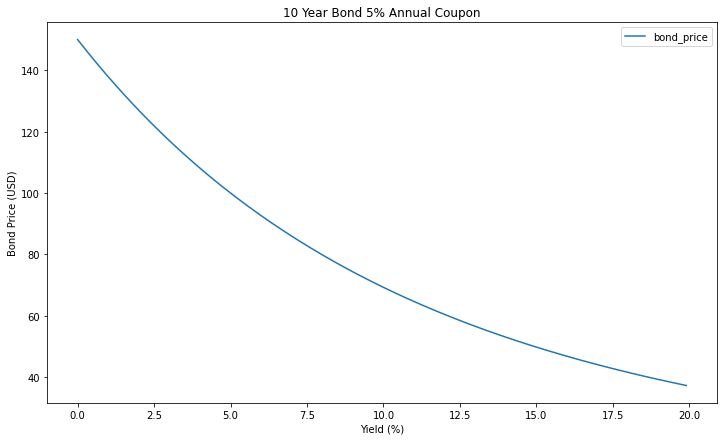

In [28]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt

bond_yields = np.arange(0.001, 20, 0.1)
bond = pd.DataFrame(bond_yields, columns=['bond_yield'])
bond['bond_price'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=10, pmt=5, fv=100)
plt.figure(figsize=(12,7))
plt.plot(bond['bond_yield'], bond['bond_price'], label='bond_price')
plt.xlabel('Yield (%)')
plt.ylabel('Bond Price (USD)')
plt.title("10 Year Bond 5% Annual Coupon")
plt.legend()
plt.show()

## **Bond premium vs. bond discount**

* **Premium**: Price > 100, or Yield < Coupon
* **Discount**: Price < 100, or Yield > Coupon
* **Par**: Price = 100, or Yield = Coupon

### **Plotting bond prices against yields**

Being able to plot a graph of bond prices against yields can help to investigate what will happen to a bond or portfolio of bonds for different levels of interest rates in the market.

Now you are going to create a graph of bond prices against yields, but this time for two bonds of different maturities. You will do this by giving your pandas DataFrame extra columns for each additional bond. The bonds you will consider will both pay a `5`% coupon, but now you will plot a `5` year and a `10` year bond.

numpy, numpy_financial, pandas, and matplotlib have already been imported for you as `np`, `npf`, `pd`, and `plt`, respectively.

* Create an array of bond yields from `0` to `20` (not inclusive) in increments of `0.1`.
* Convert this array into a pandas DataFrame and name the column `bond_yield`.
* Add two more columns, one for each bond (5-year and 10-year), and find the price for a given level of yield.
* Plot a graph of these bonds, setting the x-axis label to `Yield (%)` and y-axis label to `Bond Price (USD)`.

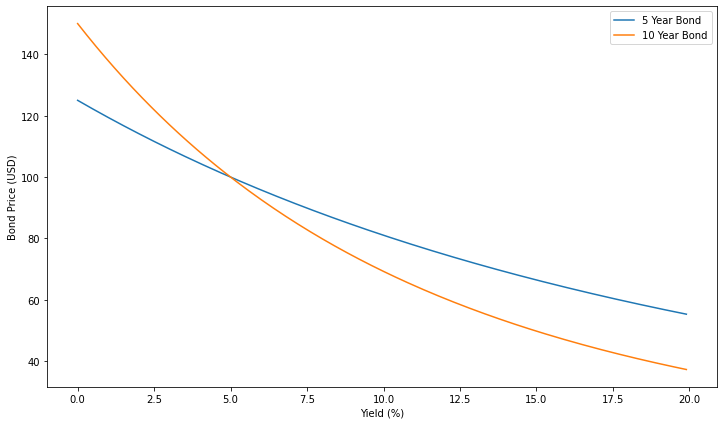

In [35]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt

# Create an array of bond yields and convert to DataFrame
bond_yields = np.arange(0.0000001, 20, 0.1)
bond = pd.DataFrame(bond_yields, columns=['bond_yield'])

# Add columns for different bonds
bond['bond_price_5Y'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=5, pmt=5, fv=100)
bond['bond_price_10Y']= -npf.pv(rate=bond['bond_yield'] / 100, nper=10, pmt=5, fv=100)

# Plot graph of bonds
plt.figure(figsize=(12,7))
plt.plot(bond['bond_yield'], bond['bond_price_5Y'], label='5 Year Bond')
plt.plot(bond['bond_yield'], bond['bond_price_10Y'], label='10 Year Bond')
plt.xlabel('Yield (%)')
plt.ylabel('Bond Price (USD)')
plt.legend()
plt.show()

The bond with longer maturity is much more sensitive to changes in yield.

# **Zero coupon bond yield formula**

\begin{align*}
PV & = \frac{FV}{(1+r)^n}\\
FV & = PV\times(1+r)^n\\
(1+r)^n & = \frac{FV}{PV}\\
1+r & = \left( \frac{FV}{PV} \right)^{\frac{1}{n}}\\
r & = \left( \frac{FV}{PV} \right)^{\frac{1}{n}} - 1
\end{align*}

# **Coupon bond yield formula?**

$$PV = \frac{C}{1+r} + \frac{C}{(1+r)^2} + \cdots + \frac{C+P}{(1+r)^n}$$

* Cannot be solved analytically in terms of $r$

### **Comparing zero coupon bond yields**

Since changing the price of a bond affects the yield and the yield represents the return on investment, comparing different prices allows you to calculate the return you can make from different bonds of different prices.

In this exercise, you will compare the same zero coupon bond at different prices to see how it affects its yield. You will work directly with the formula calculated earlier.

Take a `5` year zero coupon bond with a face value of `100`, and compare its yield when it has a price of USD `84.67` and USD `98.33`.

Recall the formula for zero coupon bond yield is 

$$PV = \frac{FV}{(1+r)^n}$$
 
1. Find the yield of a `5` year zero coupon bond with a face value of USD `100` and price of USD `84.67`.

2. Find the yield of a `5` year zero coupon bond with a face value of USD `100` and price of USD `78.22`.

In [39]:
import numpy_financial as npf

# Find the first zero coupon bond yield
bond_1 = (100/84.67)**(1/5)-1
bond_2 = (100/78.22)**(1/5)-1

# Print the result
print("ZCB Price USD 84.67: {:,.2f}".format(bond_1))
print("ZCB Price USD 78.22: {:,.2f}".format(bond_2))

ZCB Price USD 84.67: 0.03
ZCB Price USD 78.22: 0.05


### **Comparing coupon bond yields**

Often you will be presented with several bonds with different characteristics, and it isn't clear which one has the highest yield.

In these cases, it can be helpful to find their yields in order to compare them properly, since the yield tells you which bond will give you the greatest return on your investment.

In this exercise, you will use the `npf.rate()` to compare three different bonds.

`numpy_financial` has already been imported for you as `npf`.

1. Find the yield of a three-year bond paying a `3`% annual coupon with a price of USD `92`.
2. Find the yield of a five-year bond paying a `6`% annual coupon with a price of USD `102`.
3. Find the yield of a five-year bond paying a `3`% annual coupon with a price of USD `95`.


In [41]:
import numpy_financial as npf 

# Bond with price of USD 92 paying 3% coupon for 3 years
bond_a = npf.rate(nper=3, pmt=3, pv=-92, fv=100)
print("Bond A: {:,.3f}".format(bond_a))

# Bond with price of USD 102 paying 6% coupon for 5 years
bond_b = npf.rate(nper=5, pmt=6, pv=-102, fv=100)
print("Bond B: {:,.3f}".format(bond_b))

# Bond with price of USD 95 paying 3% coupon for 5 years
bond_c = npf.rate(nper=5, pmt=3, pv=-95, fv=100)
print("Bond C: {:,.3f}".format(bond_c))

Bond A: 0.060
Bond B: 0.055
Bond C: 0.041


# **Duration**

**Example:** 

  * Take a `5` year & `10` year bond, both with a `5`% coupon
  * At a `5`% yield they both have a price of USD `100`:

In [2]:
import numpy_financial as npf

print(-npf.pv(rate=0.05, nper= 5, pmt=5, fv=100))
print(-npf.pv(rate=0.05, nper=10, pmt=5, fv=100))

100.0
100.0


If interest rates move up to `6`%:

In [3]:
print(-npf.pv(rate=0.06, nper=5, pmt=5, fv=100))
print(-npf.pv(rate=0.06, nper=10, pmt=5, fv=100))

95.78763621443429
92.63991294858529


The 10 year bond was more sensitive to interest rate changes.

# **What is duration?**

* Duration is the ***% price change*** for a ***1% change in yields*** (interest rates).
* Higher duration = higher interest rate risk
* Typically used to:
  * Measure interest rate risk
  * Hedge interest rate risk
  * Predict profit & loss as interest rates change

# **Simplified formula for Duration**

$$Duration = \frac{P_{down}-P_{up}}{2P\Delta Y}$$

* $P_{down}$ = Bond price at 1% lower yield
* $P_{up}$ = Bond price at 1% higher yield
* $P$ = Bond price at current yield
* $\Delta Y$ = Change in yield (we will use 1%)

`10` year bond, `5`% annual coupon, `4`% yield to maturity, what is its duration?

In [11]:
import numpy_financial as npf

price = -npf.pv(rate=0.05, nper=10, pmt=5, fv=100)
price_up = -npf.pv(rate=0.06, nper=10, pmt=5, fv=100)
price_down = -npf.pv(rate=0.04, nper=10, pmt=5, fv=100)
duration = (price_down - price_up) / (2 * price * 0.01)
print(duration)

7.735491415384871


### **Interest rate sensitivity of two bonds**

Knowing the interest rate sensitivity of a bond or portfolio of bonds is important for investors. It allows them to gauge how exposed they are to changes in interest rates and make sure this exposure is within their risk tolerance.

In this exercise, you will compare the price impact on two bonds from a change in interest rates to establish which bond has a higher level of interest rate sensitivity.

You will consider two bonds; 

* a ten year and a twenty year bond, 
* both paying an annual coupon of `3`%, with a face value of USD `100`. `numpy_financial` has been imported for you as `npf`.

1. Find the price of a `10` year bond with a `3`% coupon and `3`% yield and print the result.
2. Find the price of the same `10` year bond but with a `4`% 
yield instead and print the result.
3. Find the price of a `20` year bond with a `3`% coupon and `3`% yield and print the result.
4. Find the price of the same `20` year bond but with a yield of `4`% instead and print the result.

In [9]:
import numpy_financial as npf 

# Price a 10 year bond with 3% annual coupon at 3% yield and print
bond_1 = -npf.pv(rate=0.03, nper=10, pmt=3, fv=100)
print("10 Year Bond 3% Yield: ", bond_1)

# Price a 10 year bond with 3% annual coupon at 4% yield and print
bond_2 = -npf.pv(rate=0.04, nper=10, pmt=3, fv=100)
print("10 Year Bond 4% Yield: ", bond_2)

# Price a 20 year bond with 3% annual coupon at 3% yield and print
bond_3 = -npf.pv(rate=0.03, nper=20, pmt=3, fv=100)
print("20 Year Bond 3% Yield: ", bond_3)

# Price a 20 year bond with 3% annual coupon at 4% yield and print
bond_4 = -npf.pv(rate=0.04, nper=20, pmt=3, fv=100)
print("20 Year Bond 4% Yield: ", bond_4)

10 Year Bond 3% Yield:  100.0
10 Year Bond 4% Yield:  91.88910422064497
20 Year Bond 3% Yield:  100.0
20 Year Bond 4% Yield:  86.4096736550323


The bond with the higher maturity was more sensitive to interest rate changes.

### **Zero coupon and coupon bond duration**

***Duration*** is a measure of interest rate risk that can be applied to any bond, regardless of whether it pays a coupon or not.

In this exercise, you are going to calculate the duration of a zero coupon bond with a `10` year maturity, face value of USD `100`, and a yield to maturity of `3`%, and compare its duration to the same bond paying a `3`% annual coupon. 

Recall that the formula for duration is given by:

$$Duration = \frac{P_{down}-P_{up}}{2P\Delta Y}$$
 
1. Find the duration of a `10` year zero coupon bond with a `3`% yield, then print the result.

2. Find the duration of a `10` year bond with a `3`% coupon and `3`% yield, then print the result.

In [12]:
# Find the price of the zero coupon bond at current yield levels
price = -npf.pv(rate=0.03, nper=10, pmt=0, fv=100)

# Find the price of the zero coupon bond at 1% higher yield levels
price_up = -npf.pv(rate=0.04, nper=10, pmt=0, fv=100)

# Find the price of the zero coupon bond at 1% lower yield levels
price_down = -npf.pv(rate=0.02, nper=10, pmt=0, fv=100)

# Calculate duration using the formula and print result
duration = (price_down - price_up) / (2 * price * 0.01)
print("Zero Coupon Bond Duration: ", duration)

# Find the price of the coupon bond at current yield levels
price = -npf.pv(rate=0.03, nper=10, pmt=3, fv=100)

# Find the price of the coupon bond at 1% higher yield levels
price_up = -npf.pv(rate=0.04, nper=10, pmt=3, fv=100)

# Find the price of the coupon bond at 1% lower yield levels
price_down = -npf.pv(rate=0.02, nper=10, pmt=3, fv=100)

# Calculate duration using the formula
duration = (price_down-price_up)/(2*0.01*price)

# Print the result
print("Coupon Paying Bond Duration: ", duration)

Zero Coupon Bond Duration:  9.728888259316797
Coupon Paying Bond Duration:  8.54674039279864


Coupon bonds are less sensitive to interest rates than their zero coupon equivalents. 

# **Plotting bond maturity against duration**


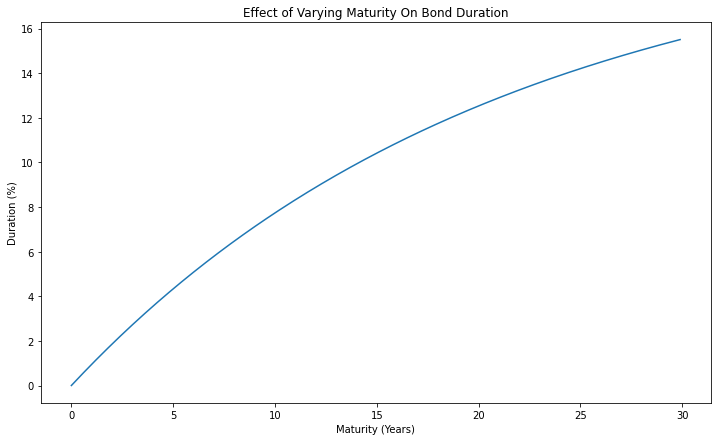

In [14]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt

bond_maturity = np.arange(0.00000000001, 30, 0.1)
bond = pd.DataFrame(bond_maturity, columns=['bond_maturity'])
bond['price'] = -npf.pv(rate=0.05, nper=bond['bond_maturity'], pmt=5, fv=100)
bond['price_up'] = -npf.pv(rate=0.05 + 0.01, nper=bond['bond_maturity'], pmt=5, fv=100)
bond['price_down'] = -npf.pv(rate=0.05 - 0.01, nper=bond['bond_maturity'], pmt=5, fv=100)
bond['duration'] = (bond['price_down'] - bond['price_up']) / (2 * bond['price'] * 0.01)

plt.figure(figsize=(12,7))
plt.plot(bond['bond_maturity'], bond['duration'])
plt.xlabel('Maturity (Years)')
plt.ylabel('Duration (%)')
plt.title("Effect of Varying Maturity On Bond Duration")
plt.show()

### **Comparing the duration of two bonds directly**

A quick way to check the impact of a factor on duration is to find the duration of two different bonds where you increase this factor and see what effect it has on the bond's duration.

In this exercise, you will calculate the duration of a `10` year and a `20` year bond, both paying an annual coupon of `3`%, with a face value of USD `100`, and yield to maturity of `5`%.

1. Find the duration of the `10` year bond and print the result.

2. Find the duration of the `20` year bond and print the result.

In [15]:
import numpy_financial as npf 

# Find & print duration of 10 year bond with 3% coupon & 5% yield
price_10y = -npf.pv(rate=0.05, nper=10, pmt=3, fv=100)
price_up_10y = -npf.pv(rate=0.06, nper=10, pmt=3, fv=100)
price_down_10y = -npf.pv(rate=0.04, nper=10, pmt=3, fv=100)
duration_10y = (price_down_10y - price_up_10y) / (2 * price_10y * 0.01)
print("10 Year Bond: ", duration_10y)

# Find & print duration of 20 year bond with 3% coupon & 5% yield
price_20y = -npf.pv(rate=0.05, nper=20, pmt=3, fv=100)
price_up_20y = -npf.pv(rate=0.06, nper=20, pmt=3, fv=100)
price_down_20y = -npf.pv(rate=0.04, nper=20, pmt=3, fv=100)
duration_20y = (price_down_20y - price_up_20y) / (2 * price_20y * 0.01)
print("20 Year Bond: ", duration_20y)



10 Year Bond:  8.260370518687731
20 Year Bond:  13.865652120642753


ou can see that the 20 year bond has a higher duration than the 10 year bond, as expected.

### **Using the steepness of the price/yield line**

In the previous video, you saw that you can plot a graph of bond prices against yields and check its steepness visually to determine where it has the highest duration.

In this exercise, you are going to replicate this plot yourself to see how bond yields affect bond duration. You will consider a `20` year bond with a `5`% coupon and face value of USD `100`.

* Create an array of `bond yields` from `0` to `20` in increment sizes of `0.1`.
* Convert this array into a pandas DataFrame called `bond` and name the column `bond_yield`.
* Add the column `bond_price` to the DataFrame and assign it a `20` year bond with a `5`% coupon and face value of USD `100`, whose yield depends on the value of `bond_yield`.
* Plot a graph of the `bond_yield` column on the x-axis against the `bond_price` column on the y-axis.
* Give the x-axis the label `'Yield (%)'`.
* Give the y-axis the label `'Bond Price (USD)'`.

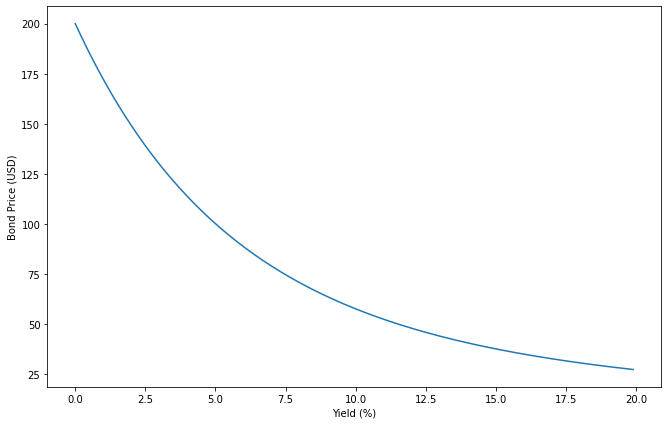

In [18]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt

# Create an array of bond yields
bond_yields = np.arange(0.000001, 20, 0.1)

# Convert this array into a pandas DataFrame and add column title
bond = pd.DataFrame(bond_yields, columns=['bond_yield'])

# Add bond price column with price varying according to the yield
bond['bond_price'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=20, pmt=5, fv=100)

# Plot graph of bond yields against prices, add x-axis and y-axis labels, show plot
plt.figure(figsize=(11,7))
plt.plot(bond['bond_yield'], bond['bond_price'])
plt.xlabel('Yield (%)')
plt.ylabel('Bond Price (USD)')
plt.show()

By using the slope of the price/yield graph, we can see that low yielding bonds are more sensitive to changes in interest rates than the same bond with a higher yield.

### **Plotting duration vs. the factor**

Plotting a graph of duration against a factor such as maturity, coupons, or yields is a great way to see how the factor affects the ***duration*** of a bond.

In the video, we plotted a graph of duration against maturity. In this exercise, you are going to do the same thing for the ***coupon rate***. You will use a `10` year bond with a yield of `5`% and face value of USD `100`.

* Create an array of coupons from `0` to `10` in increment sizes of `0.1`, and convert to a pandas DataFrame.
* Add four additional columns to the DataFrame; `price`, `price_up`, `price_down`, and `duration` for the bond.
* Plot a graph with `bond_coupon` on the x-axis and `duration` on the y-axis.

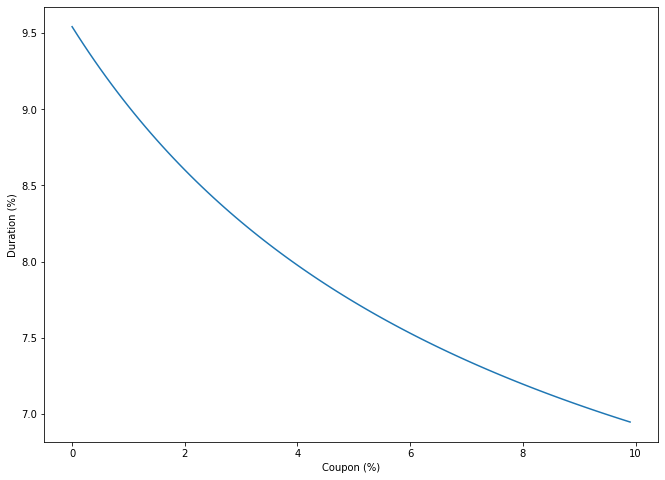

In [21]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt

# Create array of coupon rates and assign to pandas DataFrame
bond_coupon = np.arange(0.001, 10, 0.1)
bond = pd.DataFrame(bond_coupon, columns=['bond_coupon'])

# Calculate bond price, price_up, price_down, and duration
bond['price'] = -npf.pv(rate=0.05, nper=10, pmt=bond['bond_coupon'], fv=100)
bond['price_up'] = -npf.pv(rate=0.06, nper=10, pmt=bond['bond_coupon'], fv=100)
bond['price_down'] = -npf.pv(rate=0.04, nper=10, pmt=bond['bond_coupon'], fv=100)
bond['duration'] = (bond['price_down'] - bond['price_up']) / (2 * bond['price'] * 0.01)

# Plot coupon vs. duration, add labels & title, show plot
plt.figure(figsize=(11, 8))
plt.plot(bond['bond_coupon'], bond['duration'])
plt.xlabel('Coupon (%)')
plt.ylabel('Duration (%)')
plt.show()

When you increased the maturity of a bond, it increased the duration, whereas here, you can see that increasing the coupon rate decreases the duration of a bond.

# **Dollar duration**

* ***Duration*** = % change in bond price for 1% change in yields
* ***Dollar duration*** = \$ change in bond price for 1% change in yields:
* Tells us how much money we make or lose for a change in interest rates

$$\text{Dollar Duration} = \text{Duration} \times \text{Bond Price} × 0.01$$

# **DV01**

* ***DV01*** = \$ change in bond price for 0.01% change in yields.

$$\text{DV01} = \text{Duration} \times \text{Bond Price} × 0.0001$$

# **Duration neutral portfolio**

* Hedge against change in interest rate

## **Hedging DV01 example**

Say your portfolio has a DV01 of 10,000 USD. You can hedge this interest rate exposure by selling 10,000 USD worth of DV01 of a bond. 

* Suppose bond has a price of USD 92.28 and duration of 7.98%



In [22]:
DV01 = 92.28 * 7.98 * 0.0001
print("DV01: ", DV01)

DV01:  0.07363944


With DV01 of USD `0.0736`,  by dividing the DV01 of our portfolio by the DV01 of the bond, 

In [24]:
portfolio_dv01 = 10000
bond_dv01 = 0.0736
hedge_quantity = portfolio_dv01 / bond_dv01
print("Number of bonds to sell: {:,.0f}".format(hedge_quantity))

Number of bonds to sell: 135,870


we see that we need 135,870 units of the bond to hedge our portfolio.

Multiplying the quantity of bonds by their price,

In [25]:
bond_price = 92.28
hedge_amount = hedge_quantity * bond_price
print("Dollar amount to sell: USD {:,.0f}".format(hedge_amount))

Dollar amount to sell: USD 12,538,043


This costs around twelve and a half million dollars.

# **Bond price prediction using Duration**

$$Price\  Change = −100 × Dollar Duration × ΔY$$

## **Price prediction example**

* 10 year bond with 4% coupon and 5% yield

In [30]:
import numpy_financial as npf

print("Price = {:,.2f}".format(-npf.pv(rate=0.05, nper=10, pmt=4, fv=100)))

price = -npf.pv(rate=0.05, nper=10, pmt=4, fv=100)
price_up = -npf.pv(rate=0.06, nper=10, pmt=4, fv=100)
price_down = -npf.pv(rate=0.04, nper=10, pmt=4, fv=100)
duration = (price_down - price_up) / (2 * price * 0.01)
dollar_duration = price * duration * 0.01
print(f"Duration = {duration:,.2f}")
print(f"Dollar Duration = {price * duration * 0.01:,.2f}")

Price = 92.28
Duration = 7.98
Dollar Duration = 7.36


"***Estimated***" bond price change if interest rates drop 3%:

In [34]:
print(f"Estimated price change = ${-100 * dollar_duration * -0.03:,.2f}")

Estimated price change = $22.08


"***Actual***" change from repricing the bond:
* Yield drops from 5% by 3% so `rate=0.02`

In [36]:
print(f"Actual price change  = ${-npf.pv(rate=0.02, nper=10, pmt=4, fv=100) - price:,.2f}")

Actual price change  = $25.69


### **Percent duration and dollar duration**

***Dollar duration*** and ***DV01*** are more commonly used in the real world to quickly measure the interest rate risk of a bond or portfolio. They can also be used for other financial instruments that contain some interest rate risk.

In this exercise, you are going to find the dollar duration and DV01 of a bond. The bond has a `30` year maturity, coupon rate of `3.5`%, yield to maturity of `5`%, and face value of USD `100`.

* Find the duration of a `30` year bond with a coupon rate of `3.5`% and yield of `5`% in the usual way.
* Find the ***dollar duration*** of the bond.
* Find the ***DV01*** of the bond.

In [5]:
import numpy_financial as npf 

# Find the duration of the bond
price = -npf.pv(rate=0.05, nper=30, pmt=3.5, fv=100)
price_up = -npf.pv(rate=0.06, nper=30, pmt=3.5, fv=100)
price_down = -npf.pv(rate=0.04, nper=30, pmt=3.5, fv=100)
duration = (price_down - price_up)/(2 * 0.01 * price)

print(f"Price: {price:,.2f}")

# Find the dollar duration of the bond
dollar_duration = duration * price * 0.01
print("Dollar Duration: {:,.2f}".format(dollar_duration))

# Find the DV01 of the bond
dv01 = duration * price * 0.0001
print("DV01: {:,.4f}".format(dv01))

Price: 76.94
Dollar Duration: 12.88
DV01: 0.1288


### **Creating a duration neutral portfolio**

Hedging is a very important part of working with bonds and bond portfolios. In this exercise, you are going to find the quantity of a bond needed to hedge a portfolio, as well as the dollar amount of this quantity.

Say you own a portfolio of bonds whose combined ***DV01*** is USD `5000`. You decide to hedge this portfolio by selling a fixed amount of the `30` year bond from the previous exercise, which has a price of USD `76.94` and a `DV01` of `12.88` cents.

* Assign the ***DV01*** of the portfolio and the bond to `portfolio_dv01`, `bond_dv01`, respectively, and the bond price to `bond_price`.
* Find the number of bonds needed to hedge the portfolio.
* Find the dollar value of this amount of bonds.

In [8]:
import numpy_financial as npf

bond_price =-npf.pv(rate=0.05, nper=30, pmt=3.5, fv=100)
price_up = -npf.pv(rate=0.06, nper=30, pmt=3.5, fv=100)
price_down = -npf.pv(rate=0.04, nper=30, pmt=3.5, fv=100)
duration = (price_down - price_up)/(2 * 0.01 * bond_price)
bond_dv01 = duration * price * 0.0001
portfolio_dv01 = 5000

# Calculate quantity of bond to hedge portfolio
hedge_quantity = portfolio_dv01 / bond_dv01
print("Number of bonds to sell: {:,.0f}".format(hedge_quantity))

# Calculate dollar amount of bond to hedge portfolio
hedge_amount = hedge_quantity * bond_price
print("Dollar amount to sell: USD {:,.0f}".format(hedge_amount))

Number of bonds to sell: 38,811
Dollar amount to sell: USD 2,986,150


On a bond trading desk, traders will often refer to the size of their positions by their ***DV01*** instead of the number or dollar amounts of bonds they have, e.g., I'm long USD 20k of ***DV01***.

### **Predicting price impacts from duration**

Using duration to predict price impacts is very common when managing a large portfolio of bonds, where repricing each bond would be very time consuming. Instead, you can find the dollar duration of the portfolio and use this to predict what will happen to the portfolio as interest rates change.

In this exercise, you will estimate the price change of a bond using duration, then compare this to the actual price of the bond to see how accurate your estimate was.

The bond has a maturity of `5` years, coupon of `7`%, yield of `4`%, and face value of USD `100`. It has a price of USD `113.36` and dollar duration of USD `4.83`. You will predict the price change for a `2`% decrease in interest rates.

* Assign the bond price, dollar duration, and yield change to `bond_price`, `dollar_duration`, and `yield_change`, respectively.
* Calculate the expected price change using dollar duration.
* Calculate the actual price change by repricing the bond at `2`% yields and subtracting its previous price.

In [3]:
import numpy_financial as npf 

# Assign bond price, dollar duration, yield change to variables

bond_price = -npf.pv(rate=0.04, nper=5, pmt=7, fv=100)
price_up = -npf.pv(rate=0.05, nper=5, pmt=7, fv=100)
price_down = -npf.pv(rate=0.03, nper=5, pmt=7, fv=100)
duration = (price_down - price_up)/(2 * bond_price * 0.01)
dollar_duration = bond_price * duration /100
yield_change = -0.02

# Predict bond price change using duration
price_prediction = -100 * dollar_duration * yield_change
print("Predicted Change: USD {:,.2f}".format(price_prediction))

# Find actual price change and compare
price_actual = -npf.pv(rate=0.02, nper=5, pmt=7, fv=100) - bond_price
print("Actual Change: USD {:,.2f}".format(price_actual))
print("Estimation Error: USD {:,.2f}".format(price_prediction - price_actual))

Predicted Change: USD 9.66
Actual Change: USD 10.21
Estimation Error: USD -0.55


This estimation error is due in part to something called **convexity**.

# **Plotting predicted vs. actual prices**

* `20` year maturity
* `5`% coupon
* `5%` yield

$$\text{Price Change} = -100 \times \text{Dollar Duration} \times \Delta Y$$




Bond Price (USD):  100.0
Dollar Duration (USD): 12.53




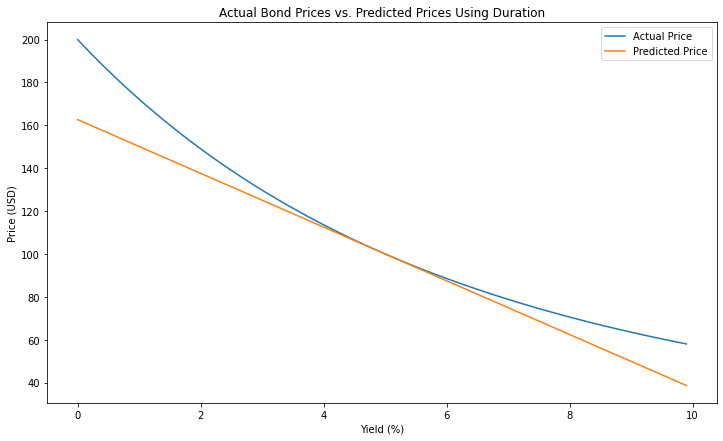

In [16]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt

price = -npf.pv(rate=0.05, nper=20, pmt=5, fv=100)
price_up = -npf.pv(rate=0.06, nper=20, pmt=5, fv=100)
price_down = -npf.pv(rate=0.04, nper=20, pmt=5, fv=100)
duration = (price_down - price_up) / (2 * price * 0.01)
dollar_duration = duration * price * 0.01
print("Bond Price (USD): ", price)
print("Dollar Duration (USD): {:,.2f}\n\n".format(dollar_duration))

bond_yields = np.arange(0.00001, 10, 0.1)
bond = pd.DataFrame(bond_yields, columns=['bond_yield'])
bond['price'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=20, pmt=5, fv=100)
bond['yield_change'] = bond['bond_yield'] - 5
bond['price_change'] = -100 * dollar_duration * bond['yield_change'] / 100
bond['predicted_price'] = price + bond['price_change']

plt.figure(figsize=(12,7))
plt.plot(bond['bond_yield'], bond['price'])
plt.plot(bond['bond_yield'], bond['predicted_price'])
plt.xlabel('Yield (%)')
plt.ylabel('Price (USD)')
plt.title("Actual Bond Prices vs. Predicted Prices Using Duration")
plt.legend(["Actual Price", "Predicted Price"])
plt.show()

## **Duration is accurate for small yield changes only**

# **Simplified Convexity Formula**

$$Convexity = \frac{P_{down} + P_{up}-2P}{P(\Delta Y)^2}$$

* $P_{down}$= Bond price at 1% lower yield
* $P_{up}$ = Bond price at 1% higher yield
* 2P = Double the bond price at current yield
* $(\Delta Y)^2$ = Change in yield squared (we will use $(1\%)^ 2$)

## **Convexity example**

* `10` year bond, 
* `5`% annual coupon, 
* `4`% yield to maturity



In [10]:
import numpy_financial as npf 

price = -npf.pv(rate=0.04, nper=10, pmt=5, fv=100)
price_up = -npf.pv(rate=0.05, nper=10, pmt=5, fv=100)
price_down = -npf.pv(rate=0.03, nper=10, pmt=5, fv=100)
convexity = (price_down + price_up - 2 * price) / (price * 0.01 ** 2)
print("Convexity: {:,.2f} ".format(convexity))

Convexity: 77.57 


### **Predicted vs. actual prices I**

Plotting the predicted prices of bonds for different levels of yields using duration, then comparing these predicted prices to the actual prices of the bond is a great way of visualizing the accuracy of duration.

In this exercise, you will begin by finding the duration of the bond, as well as the price of the bond at different yield levels. In the next exercise, you will find the predicted price from duration and plot the difference.

The bond you will consider is 
* a `10` year bond 
* paying an annual coupon of `5v% and 
* a yield to maturity of `5`%.

* Find the duration and dollar duration of the bond.
* Create an array of bond yields from 0 to 10 in increments of 0.1 and convert this array to a pandas DataFrame called `bond_yield`.
* Add the column `price` containing the bond price for each level of yield.

In [14]:
import numpy as np
import numpy_financial as npf
import pandas as pd

# Price a 10 year bond with 5% coupon and 5% yield, reprice at higher and lower yields
price = -npf.pv(rate=0.05, nper=10, pmt=5, fv=100)
price_up = -npf.pv(rate=0.06, nper=10, pmt=5, fv=100)
price_down = -npf.pv(rate=0.04, nper=10, pmt=5, fv=100)

# Find the duration and dollar duration of the bond
duration = (price_down - price_up)/(2*0.01*price)
dollar_duration = duration * price * 0.01

# Create an array of yields from 0 to 10 in steps of 0.1, convert to DataFrame
bond_yields = np.arange(0.00001, 10, 0.1)
bond = pd.DataFrame(bond_yields, columns=['bond_yield'])

# Add a column called price with the bond price for each yield level
bond['price'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=10, pmt=5, fv=100)

### **Predicted vs. actual prices II**

Plotting the predicted prices of bonds for different levels of yields using duration, then comparing these predicted prices to the actual prices of the bond is a great way of visualizing the accuracy of duration.

In the previous exercise, you found the duration of the bond, and created a DataFrame with the actual bond prices at each level of yield. In this exercise, you will add columns to this DataFrame containing the predicted bond prices using duration, then plot the difference between the predicted price and the actual price.

* Add the column `yield_change` with the current yield minus original yield.
* Add the column `price_change` with the predicted bond price change using dollar duration.
* Add the column `predicted_price` combining the original bond price with the price change.
* Add a plot of bond yields against actual prices and against predicted prices on the same axes, and show the plot.

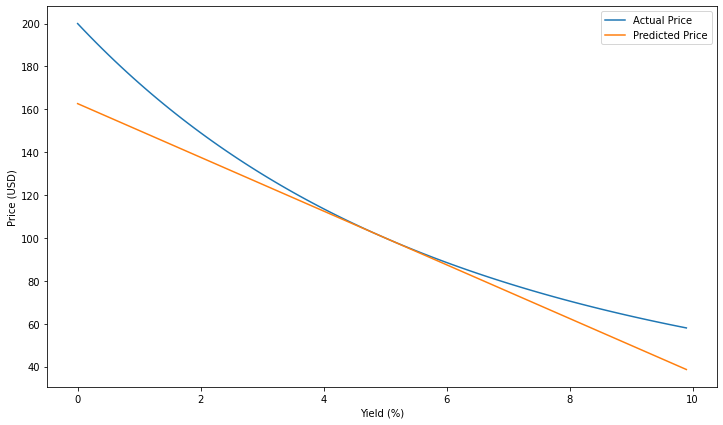

In [18]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt

price = -npf.pv(rate=0.05, nper=10, pmt=5, fv=100)

# Add a column called yield_change with the current yield minus original yield
bond['yield_change'] = (bond['bond_yield'] - 5)

# Find the predicted bond price change using dollar duration then find predicted price
bond['price_change'] = -100 * dollar_duration * bond['yield_change'] / 100
bond['predicted_price'] = price + bond['price_change'] 

# Plot bond yields against predicted and actual prices, add labels, legend, and display
plt.figure(figsize=(12,7))
plt.plot(bond['bond_yield'], bond['price'])
plt.plot(bond['bond_yield'], bond['predicted_price'])
plt.xlabel('Yield (%)')
plt.ylabel('Price (USD)')
plt.legend(["Actual Price", "Predicted Price"])
plt.show()

As you can see, duration is an accurate estimator of bond prices for small changes in yields, but as the yield change increases, this estimate becomes less accurate.

### **Finding the convexity of a bond**

Calculating the convexity of a bond is an important step in predicting bond price changes and measuring the interest rate risk of a portfolio in a more comprehensive way.

In this exercise, you are going to find the convexity of a 

* `20` year bond that 
* pays a `6`% annual coupon, 
* has a yield to maturity of `5`%, and 
* face value of USD `100`.

Recall that the formula for convexity is given by:

$$Convexity = \frac{P_{down} + P_{up} -2P}{P(\Delta Y)^2}$$
 
* Find the price of a `20` year bond with `6`% coupon and `5`% yield
* Find the price of the same bond for a `1`% higher and `1`% lower level of yields.
* Find the convexity of the bond and print the result.

In [20]:
import numpy_financial as npf 

# Find the price of a 20 year bond with 6% coupon and 5% yield
price = -npf.pv(rate=0.05, nper=20, pmt=6, fv=100)

# Find the price of the same bond for a 1% higher and 1% lower level of yields
price_up = -npf.pv(rate=0.06, nper=20, pmt=6, fv=100)
price_down = -npf.pv(rate=0.04, nper=20, pmt=6, fv=100)

# Find the convexity of the bond and print the result
convexity = (price_up + price_down - 2*price)/(price*0.01**2)
print("Convexity: {:,.2f} ".format(convexity))

Convexity: 200.62 


# **Coupon vs. convexity**

* `10` year bonds 
* `5`% yield, 
* firrst pays no coupon, second pays `10`% coupon

In [2]:
import numpy_financial as npf

price_1 = -npf.pv(rate=0.05, nper=10, pmt=0, fv=100)
price_up_1 = -npf.pv(rate=0.06, nper=10, pmt=0, fv=100)
price_down_1 = -npf.pv(rate=0.04, nper=10, pmt=0, fv=100)
convexity_1 = (price_down_1 + price_up_1 - 2 * price_1) / (price_1 * 0.01 ** 2)

price_2 = -npf.pv(rate=0.05, nper=10, pmt=10, fv=100)
price_up_2 = -npf.pv(rate=0.06, nper=10, pmt=10, fv=100)
price_down_2 = -npf.pv(rate=0.04, nper=10, pmt=10, fv=100)
convexity_2 = (price_down_2 + price_up_2 - 2 * price_2) / (price_2 * 0.01 ** 2)

print("Zero Coupon Bond Convexity: {:,.2f} ".format(convexity_1))
print("High Coupon Bond Convexity: {:,.2f}".format(convexity_2))

Zero Coupon Bond Convexity: 99.89 
High Coupon Bond Convexity: 64.09


# **Maturity vs. convexity**

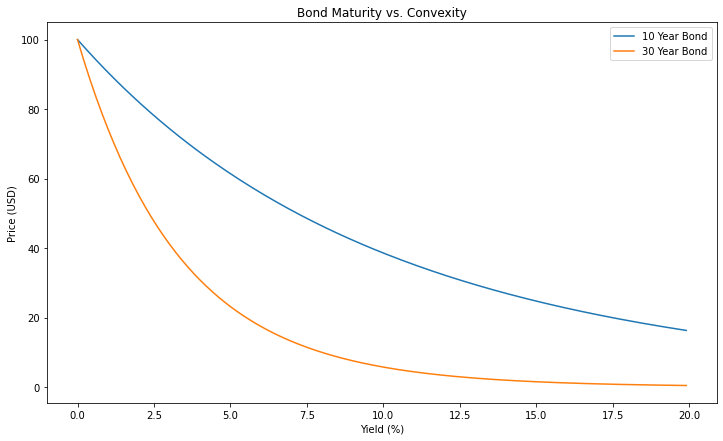

In [6]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt

bond_yields = np.arange(0.00001, 20, 0.1)
bond = pd.DataFrame(bond_yields, columns=['yield'])
bond['price_10y'] = -npf.pv(rate=bond['yield'] / 100, nper=10, pmt=0, fv=100)
bond['price_30y'] = -npf.pv(rate=bond['yield'] / 100, nper=30, pmt=0, fv=100)
plt.figure(figsize=(12,7))
plt.plot(bond['yield'], bond['price_10y'])
plt.plot(bond['yield'], bond['price_30y'])
plt.xlabel('Yield (%)')
plt.ylabel('Price (USD)')
plt.title('Bond Maturity vs. Convexity')
plt.legend(["10 Year Bond", "30 Year Bond"])
plt.show()

Bond with longer maturity has higher convexity

# **Yield vs. convexity**

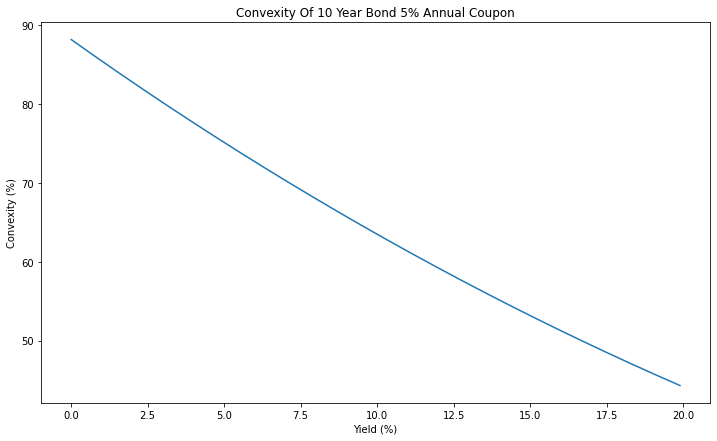

In [7]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt

bond_yields = np.arange(0.00001, 20, 0.1)
bond = pd.DataFrame(bond_yields, columns=['bond_yield'])
bond['price'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=10, pmt=5, fv=100)
bond['price_up']   = -npf.pv(rate=bond['bond_yield'] / 100 + 0.01, nper=10, pmt=5, fv=100)
bond['price_down'] = -npf.pv(rate=bond['bond_yield'] / 100 - 0.01, nper=10, pmt=5, fv=100)
bond['convexity'] = (bond['price_down'] + bond['price_up'] - 2 * bond['price']) / (bond['price'] * 0.01 ** 2)

plt.figure(figsize=(12,7))
plt.plot(bond['bond_yield'], bond['convexity'])
plt.xlabel('Yield (%)')
plt.ylabel('Convexity (%)')
plt.title("Convexity Of 10 Year Bond 5% Annual Coupon")
plt.show()

**Convexity** increases when a bond has a:
* Higher maturity
* Lower coupon
* Lower yield

### **Comparing the convexity of two bonds directly**

You can also investigate the influence of factors on bond **convexity** by pricing-up two bonds that vary only in this factor and then calculating the convexity of each bond directly.

In this exercise, you will find the **convexity** of two bonds; 

* both will be `5` year bonds 
* a yield of `3`% 
* face value of USD `100`
* the first bond will pay a `1`% coupon and the second bond will pay a `10`% coupon.

1. Find and print the convexity of a `5` year bond with a face value of USD `100`, annual coupon of `1`%, and yield of `3`%.

2. Find and print the convexity of a `5` year bond with a face value of USD `100`, annual coupon of `10`%, and yield of `3`%.

In [9]:
import numpy_financial as npf 

# Find the price of a 5 year bond with 3% yield and 1% coupon
price_1 = -npf.pv(rate=0.03, nper=5, pmt=1, fv=100)

# Shift yields up and down 1% and reprice
price_up_1 = -npf.pv(rate=0.04, nper=5, pmt=1, fv=100)
price_down_1 = -npf.pv(rate=0.02, nper=5, pmt=1, fv=100)

# Find convexity of the bond and print the result
convexity_1 = (price_down_1 + price_up_1 - 2 * price_1) / (price_1 * 0.01 ** 2)
print("Low Coupon Bond Convexity: {:,.2f}".format(convexity_1))

# Find the price of a 5 year bond with 3% yield and 10% coupon
price_2 = -npf.pv(rate=0.03, nper=5, pmt=10, fv=100)

# Shift yields up and down 1% and reprice
price_up_2 = -npf.pv(rate=0.04, nper=5, pmt=10, fv=100)
price_down_2 = -npf.pv(rate=0.02, nper=5, pmt=10, fv=100)

# Find convexity of the bond and print the result
convexity_2 =  (price_down_2 + price_up_2 - 2 * price_2) / (price_2 * 0.01 ** 2)
print("High Coupon Bond Convexity: {:,.2f}".format(convexity_2))

Low Coupon Bond Convexity: 27.51
High Coupon Bond Convexity: 22.92


The bond with the lower coupon had a higher level of convexity.

### **Using the curvature of the price/yield line**

In addition to using the steepness of the price/yield line to estimate the duration of a bond, you can also use its curvature to estimate the convexity of a bond.

In this exercise, you are going to plot a price/yield graph of two bonds in order to see which bond has the greatest convexity. Both bonds will pay a 

* `5`% annual coupon, 
* have a `5`% yield and 
* a face value of USD `100`, but 
* the first bond will be a `5` year bond, and the second a `20` year bond.


* Create an array of yields from `0` to `20` in steps of `0.1` using the `np.arange()` function.
* Convert this array to a pandas DataFrame with the column title `bond_yield`.
* Add two columns to your DataFrame, one for each bond.
* Each bond pays a `5`% coupon and has a face value of USD `100`, the first bond is a `5` year bond and the second a `20` year bond.
* Add each bond to the plot using the `plt.plot()` function.
* Add a legend with the labels "`5` Year Bond" and "`20` Year Bond".
* Show the plot.

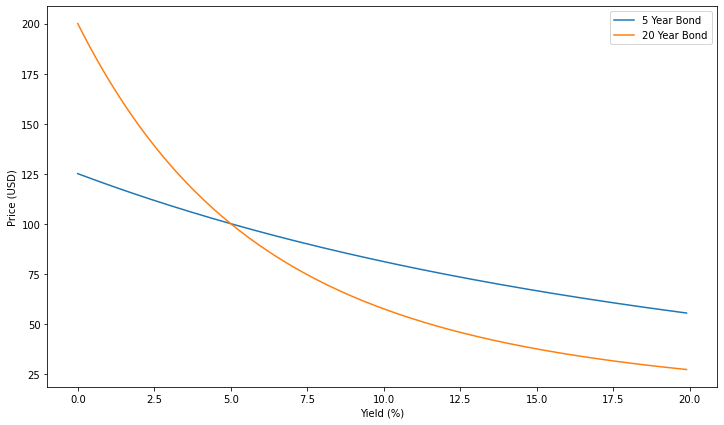

In [11]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt

# Create array of yields and convert to pandas DataFrame
bond_yields = np.arange(0.000001, 20, 0.1)
bond = pd.DataFrame(bond_yields, columns=['bond_yield'])

# Add columns for 5 year and 20 year bonds
bond['price_5y'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=5, pmt=5, fv=100)
bond['price_20y'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=20, pmt=5, fv=100)

# Create plot for bond bonds, add labels to axes, legend, and display
plt.figure(figsize=(12,7))
plt.plot(bond['bond_yield'], bond['price_5y'])
plt.plot(bond['bond_yield'], bond['price_20y'])
plt.xlabel('Yield (%)')
plt.ylabel('Price (USD)')
plt.legend(["5 Year Bond", "20 Year Bond"])
plt.show()

The bond with the higher maturity shows a much more curved price/yield relationship and therefore has a higher convexity.

### **Plotting convexity vs. the factor**

Another way to check what effect a certain factor has on bond convexity is to directly plot a graph of this factor against the bond's convexity.

In this exercise, you will price a 

* `20` year bond with 
* a `6`% coupon and 
* face value of USD `100`, 

then find the convexity of this bond for different levels of yields.

* Create an array of bond yields from `0` to `20` in increments of `0.1` and convert to a pandas DataFrame.
* Find the price of the bond, shift the yields up and down and reprice, then calculate the convexity of the bond.
* Plot a graph of bond yields on the x-axis against convexity on the y-axis.

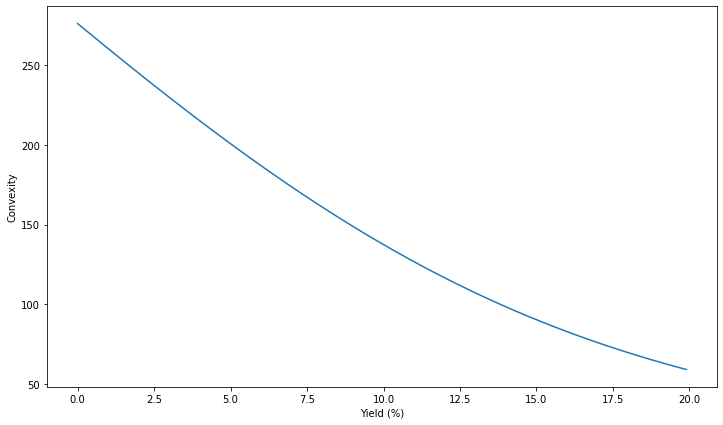

In [2]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt

# Create array of bond yields and covert to pandas DataFrame
bond_yields = np.arange(0.0001, 20, 0.1)
bond = pd.DataFrame(data=bond_yields, columns=['bond_yield'])

# Find price of bond, reprice for higher and lower yields, calculate convexity
bond['price'] = -npf.pv(rate=bond['bond_yield'] / 100, nper=20, pmt=6, fv=100)
bond['price_up'] = -npf.pv(rate=bond['bond_yield'] / 100 + 0.01, nper=20, pmt=6, fv=100)
bond['price_down'] = -npf.pv(rate=bond['bond_yield'] / 100 - 0.01, nper=20, pmt=6, fv=100)
bond['convexity'] = (bond['price_up'] + bond['price_down'] - 2 * bond['price']) / (bond['price'] * 0.01 ** 2)

# Create plot of bond yields against convexity, add labels to axes, display plot
plt.figure(figsize=(12,7))
plt.plot(bond['bond_yield'], bond['convexity'])
plt.xlabel('Yield (%)')
plt.ylabel('Convexity')
plt.show()

Bonds with lower yields have higher convexity

# **Dollar Convexity**

* Convexity = % change in duration for 1% change in yields
* **Dollar convexity** = \$ change in duration for 1% change in yields:

$$\text{Dollar Convexity} = \text{Convexity} \times \text{Bond Price} × 0.01^2$$

## **Dollar convexity example**

* `10` year bond
* `3`% coupon
* `5`% yield
* USD `100` face value

What is its dollar convexity?

In [6]:
import numpy_financial as npf 

price      = -npf.pv(rate=0.05, nper=10, pmt=3, fv=100)
price_up   = -npf.pv(rate=0.06, nper=10, pmt=3, fv=100)
price_down = -npf.pv(rate=0.04, nper=10, pmt=3, fv=100)
convexity = (price_down + price_up - 2 * price) / (price * 0.01 ** 2)
dollar_convexity = convexity * price * 0.01 ** 2
print("Dollar Convexity: ${:,.2f}".format(dollar_convexity))

Dollar Convexity: $0.70


# **Convexity Adjustment**

* Convexity  ใช้ดูการเปลี่ยนแปลงใน duration ถ้าจะมาดูการเปลี่ยนแปลงในราคาของพันธบัตร ต้อง adjust ตามด้านล่างนี้

$$\text{Convexity Adjustment} = 0.5 × \text{Dollar Convexity} × 100^2 × (\Delta Y)^2$$

## **Convexity adjustment example**

* `10` year bond
* `3`% coupon, 
* `5`% yield
* USD `100` face value

What is its convexity adjustment?



In [7]:
import numpy_financial as npf

price      = -npf.pv(rate=0.05, nper=10, pmt=3, fv=100)
price_up   = -npf.pv(rate=0.06, nper=10, pmt=3, fv=100)
price_down = -npf.pv(rate=0.04, nper=10, pmt=3, fv=100)
convexity = (price_down + price_up - 2 * price) / (price * 0.01 ** 2)
dollar_convexity = convexity * price * 0.01 ** 2
convexity_adjustment = 0.5 * dollar_convexity * 100 ** 2 * 0.01 ** 2
print("Convexity Adjustment: {:,.2f}".format(convexity_adjustment))

Convexity Adjustment: 0.35


# **Combining duration and convexity**

* Predicting price changes from duration alone:

$$\text{Price Change = −100} × \text{Dollar Duration} \times\Delta Y$$

* Predicting price changes from <ins>both duration and convexity</ins>:

$$Price \ Change = -100 \times \text{Dollar Duration} \times \Delta Y + \frac{1}{2} \times \text{Dollar Convexity} \times 100^2 \times (\Delta Y)^2$$

## **Duration and convexity example**
## **ระวัง เมื่อใส่  Convexity มาแล้ว ขนาดของการเปลี่ยนแปลงราคาเพิ่มหรือลดจะไม่เท่ากัน เพราะ convexity เป็น nonlinear relationship**

* `10` year bond, 
* `3`% coupon, 
* `5`% yield, 
* USD `100` face value:

In [15]:
import numpy_financial as npf

price      = -npf.pv(rate=0.05, nper=10, pmt=3, fv=100)
price_up   = -npf.pv(rate=0.06, nper=10, pmt=3, fv=100)
price_down = -npf.pv(rate=0.04, nper=10, pmt=3, fv=100)

duration = (price_down - price_up) / (2 * price * 0.01)
dollar_duration_i = duration*price* 0.01 # yield increases so 0.06 - 0.05 = 0.01
dollar_duration_d = duration*price*(-0.01) # yield decreases so 0.04 - 0.05 = -0.01

convexity = (price_down + price_up - 2 * price) / (price * 0.01 ** 2)
dollar_convexity = convexity * price * 0.01**2
convexity_adjustment = 0.5* dollar_convexity * 100 ** 2 * 0.01 ** 2

combined_prediction_i = -100 * dollar_duration_i * 0.01 + convexity_adjustment
combined_prediction_d = -100 * dollar_duration_d * 0.01 + convexity_adjustment
print("Predicted Price Change when yield increases by 1%: {:,.9f}".format(combined_prediction_i))
print("Predicted Price Change when yield decreases by 1%: +{:,.9f}".format(combined_prediction_d))
print(f"Actual Price Change when yield increases by 1%: {price_up-price:,.9f}")
print(f"Actual Price Change when yield decreases by 1%: {price_down-price:,.9f}")

Predicted Price Change when yield increases by 1%: -6.636791296
Predicted Price Change when yield decreases by 1%: +7.332574079
Actual Price Change when yield increases by 1%: -6.636791296
Actual Price Change when yield decreases by 1%: 7.332574079


### **Dollar convexity**

Calculating the dollar convexity of a bond is an important first step in using convexity to predict bond prices. In this exercise, you are going to calculate the dollar convexity of a 

* `10` year bond 
* paying a `2`% coupon, with 
* a yield of `3`% and 
* face value of USD `100`.

Recall that the formula for dollar convexity is given by:

$$Dollar Convexity = Cnvexity \times Bond Price \times 0.01^2$$

* Find the dollar convexity of a `10` year bond with a `2`% annual coupon and `3`% yield and print the result.

In [16]:
import numpy_financial as npf 

# Find price of a 10 year bond with 2% coupon and 3% yield, shift yields, and reprice
price      = -npf.pv(rate=0.03, nper=10, pmt=2, fv=100)
price_up   = -npf.pv(rate=0.04, nper=10, pmt=2, fv=100)
price_down = -npf.pv(rate=0.02, nper=10, pmt=2, fv=100)

# Calculate convexity of the bond
convexity = (price_down + price_up - 2 * price) / (price * 0.01 ** 2)

# Calculate dollar convexity and print the result
dollar_convexity = convexity * price * 0.01**2
print("Dollar convexity: {:,.2f}".format(dollar_convexity))

Dollar convexity: 0.84


This means that for a `1`% change in yields, the dollar duration will change by just under `84` <ins>cents</ins>.

### **Convexity adjustment**

Finding the convexity adjustment of a bond is the next step in using both duration and convexity to predict changes in bond prices. In this exercise, you are going to calculate the convexity adjustment for a 

* `10` year zero coupon bond with 
* a yield of `5`% and 
* face value of USD `100`.

Recall that the formula for the convexity adjustment is given by:

$$Convexity \ Adjustment = \frac{1}{2} \times Dollar \ Convexity \times 100^2 \times (\Delta Y)^2$$


* Find the convexity adjustment for a `10` year zero coupon bond and print the result.

In [17]:
import numpy_financial as npf 

# Find price of 10 year zero coupon bond with a 5% yield, shift yields, and reprice
price =     -npf.pv(rate=0.05, nper=10, pmt=0, fv=100)
price_up =  -npf.pv(rate=0.06, nper=10, pmt=0, fv=100)
price_down =-npf.pv(rate=0.04, nper=10, pmt=0, fv=100)

# Calculate convexity and dollar convexity of the bond
convexity = (price_down + price_up - 2 * price) / (price * 0.01 ** 2)
dollar_convexity = convexity * price * 0.01**2

# Find the convexity adjustment and print the result
convexity_adjustment = 0.5 * dollar_convexity * 100 ** 2 * 0.01 ** 2
print("Convexity adjustment: {:,.2f}".format(convexity_adjustment))

Convexity adjustment: 0.31


### **Combining duration and convexity**

Now let's combine everything you have learned in the last few chapters by using both duration and convexity to predict bond price changes. Take a 

* `7` year bond 
* an annual coupon of `3`% and 
* has a yield to maturity of `4`%.

1. Find the price of a `7` year bond that pays an annual coupon of `3`% and has a yield to maturity of `4`%, then shift the yields up and down `1`% and reprice.
2. Find the duration of the bond and the dollar duration of the bond.
3. Find the convexity, dollar convexity, and convexity adjustment for the bond.
4. Predict the bond price change for a `1`% change in yields.

In [18]:
# Find the price of 7 year bond with 3% coupon and 4% yield, shift yields and reprice
price = -npf.pv(rate=0.04, nper=7, pmt=3, fv=100)
price_up = -npf.pv(rate=0.05, nper=7, pmt=3, fv=100)
price_down = -npf.pv(rate=0.03, nper=7, pmt=3, fv=100)

# Find duration and dollar duration of the bond
duration = (price_down - price_up) / (2 * price * 0.01)
dollar_duration = duration * price * 0.01

# Find convexity, dollar convexity and convexity adjustment
convexity = (price_down + price_up - 2 * price) / (price * 0.01 ** 2)
dollar_convexity = convexity * price * 0.01 ** 2
convexity_adjustment = 0.5 * dollar_convexity * 100 ** 2 * 0.01 ** 2

# Combine duration and convexity to predict bond price change
combined_prediction = -100 * dollar_duration * 0.01 + convexity_adjustment
print("Predicted Price Change: ", combined_prediction)

Predicted Price Change:  -5.5706921248467305
